In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import matplotlib.figure as ff

# importar librerias de preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics.pairwise import euclidean_distances

# importar metricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
#TRAEMOS EL ARCHIVO EXCEL A UN DATAFRAME DE PANDAS
df = pd.read_excel("Tabla_GDP_1parcial.xlsx")
df

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,NaN,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,NaN,NaN,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,NaN,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


In [3]:
#ANALIZAMOS VALORES NULOS
df.isnull().sum()

province                  0
gdp                       2
illiteracy                2
poverty                   0
deficient_infra           0
school_dropout            2
no_healthcare             2
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

In [4]:
#ANALIZAMOS QUE MEDIDA DE TENDENCIA CENTRAL VAMOS A USAR PARA IMPUTAR LOS VALORES NULOS
school_media = df["school_dropout"].mean()
school_mediana = df["school_dropout"].median()
print(f"La media es: {round(school_media, 2)} y la mediana: {round(school_mediana, 2)}")

La media es: 1.75 y la mediana: 1.44


In [5]:
illiteracy_media = df["illiteracy"].mean()
illiteracy_mediana = df["illiteracy"].median()
print(f"La media es: {round(illiteracy_media, 2)} y la mediana: {round(illiteracy_mediana, 2)}")

La media es: 3.17 y la mediana: 2.74


In [6]:
#MANEJO DE VALORES NULOS: IMPUTACIÓN POR LA MEDIANA, CONSIDERAMOS QUE ES LA MEJOR MEDIDA DE TENDENCIA CENTRAL EN ESTE CASO
school_mediana = df["school_dropout"].median()
illiteracy_mediana = df["illiteracy"].median()

df["school_dropout"].fillna(school_mediana, inplace= True)
df["illiteracy"].fillna(illiteracy_mediana, inplace= True)

C:\Users\kemer\AppData\Local\Temp\ipykernel_21400\1160651256.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["school_dropout"].fillna(school_mediana, inplace= True)
C:\Users\kemer\AppData\Local\Temp\ipykernel_21400\1160651256.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [7]:
#ESTANDARIZAMOS LAS VARIABLES
scaler = StandardScaler()
df[["z_school_dropout", "z_illiteracy", "z_doctors_per_cap"]] = scaler.fit_transform(df[["school_dropout", "illiteracy", "doctors_per_cap"]])

In [8]:
#DEFINICIÓN DE VARIABLES PARA NUESTRO CLÚSTER
X_clustering = pd.DataFrame(df, columns = ["z_school_dropout", "z_illiteracy", "z_doctors_per_cap"], dtype=float)
X_clustering

,z_school_dropout,z_illiteracy,z_doctors_per_cap
0,-0.853003,-1.013730,-0.039069
1,-0.687099,-0.455425,-0.263350
2,-0.612902,-0.240447,3.551749
3,1.913420,-0.223286,-0.267934
4,0.764379,2.550462,-0.866760
5,-1.013607,-0.917966,-0.266068
6,-0.253304,0.033471,-0.144510
7,0.488917,0.861463,-0.977277
8,-0.893073,-0.567417,-0.629194
9,-1.354904,-0.923056,0.350293


In [9]:
#CALCULAMOS LAS DISTANCIAS EUCLIDEAS NUEVAMENTE
distances = euclidean_distances(X_clustering)
distances

array([[0.        , 0.62412376, 3.68097679, 2.88622199, 4.00055716,
        0.29409624, 1.21135719, 2.48944383, 0.74097744, 0.64166141,
        2.8705364 , 0.96891338, 4.03997214, 0.66630734, 0.85370772,
        1.42539767, 2.44441009, 1.83270191, 0.66626965, 2.27586589,
        3.44124342, 1.4694394 ],
       [0.62412376, 0.        , 3.82187154, 2.61086353, 3.39208576,
        0.56617892, 0.66431931, 1.90444163, 0.43452148, 1.02039206,
        2.62544334, 0.9306661 , 3.4445976 , 0.59466725, 0.60051186,
        0.82523032, 2.15686663, 1.56028205, 1.09006272, 2.26151045,
        2.82671717, 1.06683046],
       [3.68097679, 3.82187154, 0.        , 4.5795825 , 5.40456198,
        3.89811744, 3.72379838, 4.78960138, 4.20305681, 3.35646224,
        4.2403842 , 3.03221631, 5.77716087, 3.47933654, 3.59289206,
        4.19392258, 4.00181121, 2.90178907, 4.1783156 , 2.90280443,
        5.48243819, 3.20335262],
       [2.88622199, 2.61086353, 4.5795825 , 0.        , 3.06146465,
        3.0083332

c:\Users\kemer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kemer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\kemer\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kemer\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\kemer\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

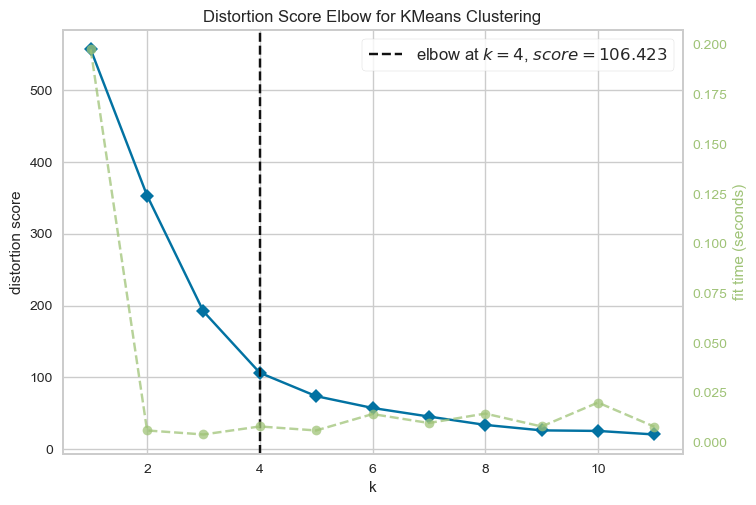

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
#MÉTODO DEL CODO PARA DETERMINAR LA CANTIDAD DE GRUPOS (K)
from sklearn.cluster import KMeans
from yellowbrick.features import parallel_coordinates
from yellowbrick.cluster import KElbowVisualizer

#GRÁFICO DEL CODO
model = KMeans()
visualizer=KElbowVisualizer(model, k = (1,12))
visualizer.fit(distances)
visualizer.show()

In [11]:
#DE ACUERDO A NUESTRO MÉTODO DEL CODO, SE DEBEN HACER GRUPOS K = 4
algorithm = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300, random_state=111, algorithm='elkan')
algorithm.fit(distances)

labels = algorithm.labels_
centroids = algorithm.cluster_centers_
X_clustering["label"] = labels


#LE PASAMOS LA VARIABLE CATEGÓRICA AL ÍNDICE
X_clustering.index = df["province"]
X_clustering.index
X_clustering.head(10)

,z_school_dropout,z_illiteracy,z_doctors_per_cap,label
province,,,,
Buenos Aires,-0.853003,-1.013730,-0.039069,1
Catamarca,-0.687099,-0.455425,-0.263350,1
Córdoba,-0.612902,-0.240447,3.551749,3
Corrientes,1.913420,-0.223286,-0.267934,0
Chaco,0.764379,2.550462,-0.866760,2
Chubut,-1.013607,-0.917966,-0.266068,1
Entre Ríos,-0.253304,0.033471,-0.144510,1
Formosa,0.488917,0.861463,-0.977277,0
Jujuy,-0.893073,-0.567417,-0.629194,1


In [12]:
#CALCULAMOS LA INERCIA DE NUESTRO MODELO
algorithm.inertia_

102.14315770923743

In [13]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'browser'

In [14]:
fig = px.scatter_3d(X_clustering, x = 'z_school_dropout', y = 'z_illiteracy', z = 'z_doctors_per_cap', color = 'label', hover_name = X_clustering.index)
fig.show()